In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

from plotly.offline import iplot, init_notebook_mode

import cufflinks as cf
import plotly.graph_objs as go
# import chart_studio.plotly as py

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='ggplot')

/kaggle/input/employee-attrition/employee_attrition_test.csv
/kaggle/input/employee-attrition/employee_attrition_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/employee-attrition/employee_attrition_train.csv', na_values= np.nan)

AGE Numerical Value

ATTRITION Employee leaving the company (0=no, 1=yes)

BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)

DAILY RATE Numerical Value - Salary Level

DEPARTMENT (1=HR, 2=R&D, 3=Sales)

DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME

EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')

EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)

EMPLOYEE COUNT Numerical Value

EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID

ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

GENDER (1=FEMALE, 2=MALE)

HOURLY RATE Numerical Value - HOURLY SALARY

JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

JOB LEVEL Numerical Value - LEVEL OF JOB

JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)

JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)

MONTHLY INCOME Numerical Value - MONTHLY SALARY

MONTHLY RATE Numerical Value - MONTHLY RATE

NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT

OVER 18 (1=YES, 2=NO)

OVERTIME (1=NO, 2=YES)

PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY

PERFORMANCE RATING Numerical Value - PERFORMANCE RATING

RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION

STANDARD HOURS Numerical Value - STANDARD HOURS

STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)

TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED

TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING

WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE

YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY

YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE

YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION

YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Lets change the column names and casings

In [3]:
df.columns.str.upper().values

array(['AGE', 'ATTRITION', 'BUSINESSTRAVEL', 'DAILYRATE', 'DEPARTMENT',
       'DISTANCEFROMHOME', 'EDUCATION', 'EDUCATIONFIELD', 'EMPLOYEECOUNT',
       'EMPLOYEENUMBER', 'ENVIRONMENTSATISFACTION', 'GENDER',
       'HOURLYRATE', 'JOBINVOLVEMENT', 'JOBLEVEL', 'JOBROLE',
       'JOBSATISFACTION', 'MARITALSTATUS', 'MONTHLYINCOME', 'MONTHLYRATE',
       'NUMCOMPANIESWORKED', 'OVER18', 'OVERTIME', 'PERCENTSALARYHIKE',
       'PERFORMANCERATING', 'RELATIONSHIPSATISFACTION', 'STANDARDHOURS',
       'STOCKOPTIONLEVEL', 'TOTALWORKINGYEARS', 'TRAININGTIMESLASTYEAR',
       'WORKLIFEBALANCE', 'YEARSATCOMPANY', 'YEARSINCURRENTROLE',
       'YEARSSINCELASTPROMOTION', 'YEARSWITHCURRMANAGER'], dtype=object)

In [4]:
df.columns = ['AGE', 'ATTRITION', 'BUSINESS_TRAVEL', 'DAILY_RATE', 'DEPARTMENT',
 'DISTANCE_FROM_HOME', 'EDUCATION', 'EDUCATION_FIELD', 'EMPLOYEE_COUNT',
 'EMPLOYEE_NUMBER', 'ENVIRONMENT_SATISFACTION', 'GENDER',
 'HOURLY_RATE', 'JOB_INVOLVEMENT', 'JOB_LEVEL', 'JOB_ROLE',
 'JOB_SATISFACTION', 'MARITAL_STATUS', 'MONTHLY_INCOME', 'MONTHLY_RATE',
 'NUM_COMPANIES_WORKED', 'OVER_18', 'OVER_TIME', 'PERCENT_SALARY_HIKE',
 'PERFORMANCE_RATING', 'RELATIONSHIP_SATISFACTION', 'STANDARD_HOURS',
 'STOCK_OPTION_LEVEL', 'TOTAL_WORKING_YEARS', 'TRAINING_TIMES_LAST_YEAR',
 'WORK_LIFE_BALANCE', 'YEARS_AT_COMPANY', 'YEARS_IN_CURRENT_ROLE',
 'YEARS_SINCE_LAST_PROMOTION', 'YEARS_WITH_CURR_MANAGER']

In [5]:
df.loc[:,df.dtypes=="object"].columns

Index(['ATTRITION', 'BUSINESS_TRAVEL', 'DEPARTMENT', 'EDUCATION_FIELD',
       'GENDER', 'JOB_ROLE', 'MARITAL_STATUS', 'OVER_18', 'OVER_TIME'],
      dtype='object')

Let's first separate true categorical columns 

According to column information and df info these following are the columns that are infact a categoical types which are now represented as numeric values:

"Employee Number" ,"environment statisfaction" , "jobinvolvement", 'job level', 'job satisfaction', 'relation satisfaction','stock_option_level','worklife balance',

In [6]:
df[['EMPLOYEE_NUMBER','ENVIRONMENT_SATISFACTION','JOB_INVOLVEMENT','JOB_LEVEL','JOB_SATISFACTION','RELATIONSHIP_SATISFACTION','WORK_LIFE_BALANCE','STOCK_OPTION_LEVEL']] = df[['EMPLOYEE_NUMBER','ENVIRONMENT_SATISFACTION','JOB_INVOLVEMENT','JOB_LEVEL','JOB_SATISFACTION','RELATIONSHIP_SATISFACTION','WORK_LIFE_BALANCE','STOCK_OPTION_LEVEL']].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         893 non-null    float64
 1   ATTRITION                   1029 non-null   object 
 2   BUSINESS_TRAVEL             1024 non-null   object 
 3   DAILY_RATE                  1002 non-null   float64
 4   DEPARTMENT                  1029 non-null   object 
 5   DISTANCE_FROM_HOME          934 non-null    float64
 6   EDUCATION                   1029 non-null   int64  
 7   EDUCATION_FIELD             1029 non-null   object 
 8   EMPLOYEE_COUNT              1029 non-null   int64  
 9   EMPLOYEE_NUMBER             1029 non-null   object 
 10  ENVIRONMENT_SATISFACTION    1029 non-null   object 
 11  GENDER                      1029 non-null   object 
 12  HOURLY_RATE                 1029 non-null   int64  
 13  JOB_INVOLVEMENT             1029 

In [8]:
print(df.iloc[:2,:10].head())
print(df.iloc[:2,10:20].head())
print(df.iloc[:2,20:].head())

    AGE ATTRITION BUSINESS_TRAVEL  DAILY_RATE              DEPARTMENT  \
0  50.0        No   Travel_Rarely      1126.0  Research & Development   
1  36.0        No   Travel_Rarely       216.0  Research & Development   

   DISTANCE_FROM_HOME  EDUCATION EDUCATION_FIELD  EMPLOYEE_COUNT  \
0                 1.0          2         Medical               1   
1                 6.0          2         Medical               1   

  EMPLOYEE_NUMBER  
0             997  
1             178  
  ENVIRONMENT_SATISFACTION GENDER  HOURLY_RATE JOB_INVOLVEMENT JOB_LEVEL  \
0                        4   Male           66               3         4   
1                        2   Male           84               3         2   

                 JOB_ROLE JOB_SATISFACTION MARITAL_STATUS  MONTHLY_INCOME  \
0       Research Director                4       Divorced           17399   
1  Manufacturing Director                2       Divorced            4941   

   MONTHLY_RATE  
0          6615  
1          2819  


In [9]:
df.describe()

,AGE,DAILY_RATE,DISTANCE_FROM_HOME,EDUCATION,EMPLOYEE_COUNT,HOURLY_RATE,MONTHLY_INCOME,MONTHLY_RATE,NUM_COMPANIES_WORKED,PERCENT_SALARY_HIKE,PERFORMANCE_RATING,STANDARD_HOURS,TOTAL_WORKING_YEARS,TRAINING_TIMES_LAST_YEAR,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,66.680272,6449.796890,14250.629738,2.653061,15.260447,3.159378,80.0,11.196307,2.782313,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,20.474094,4794.525367,7088.757938,2.508186,3.665779,0.366206,0.0,7.857581,1.283401,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,30.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,48.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,67.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,84.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,80.0,15.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,100.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,80.0,40.000000,6.000000,37.000000,18.000000,15.000000,17.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def customized_heatmap(corr_df):
#     corr_mat = corr_df.iloc[1:,:-1].copy()
    corr_mat = corr_df.copy()
    
    #Create masks
    mask = np.triu(np.ones_like(corr_mat), k=1)
    
    # Plot
    plt.figure(figsize=(20,14))
    plt.title("Heatmap Corrleation")
    ax = sns.heatmap(corr_mat, vmin=-1, vmax=1, cbar=False,
                     cmap='coolwarm', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.15 < t < 0.15:
            text.set_text('')        
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()
    
    
    

In [12]:
!pip install dython


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
from dython.nominal import associations

In [14]:
df_4_corr = df.copy()

df_4_corr.drop(['EMPLOYEE_NUMBER',"EMPLOYEE_COUNT"], inplace=True, axis=1)

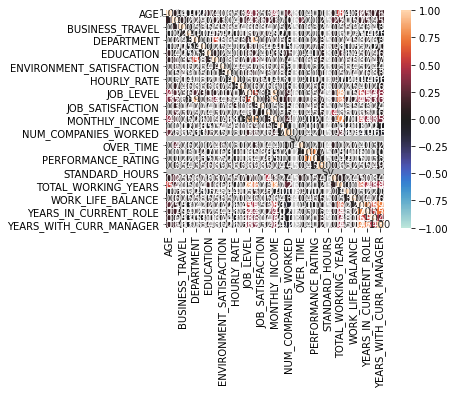

In [15]:
assoc = associations(df_4_corr,plot=False,bias_correction=False)
corr_df = assoc['corr']


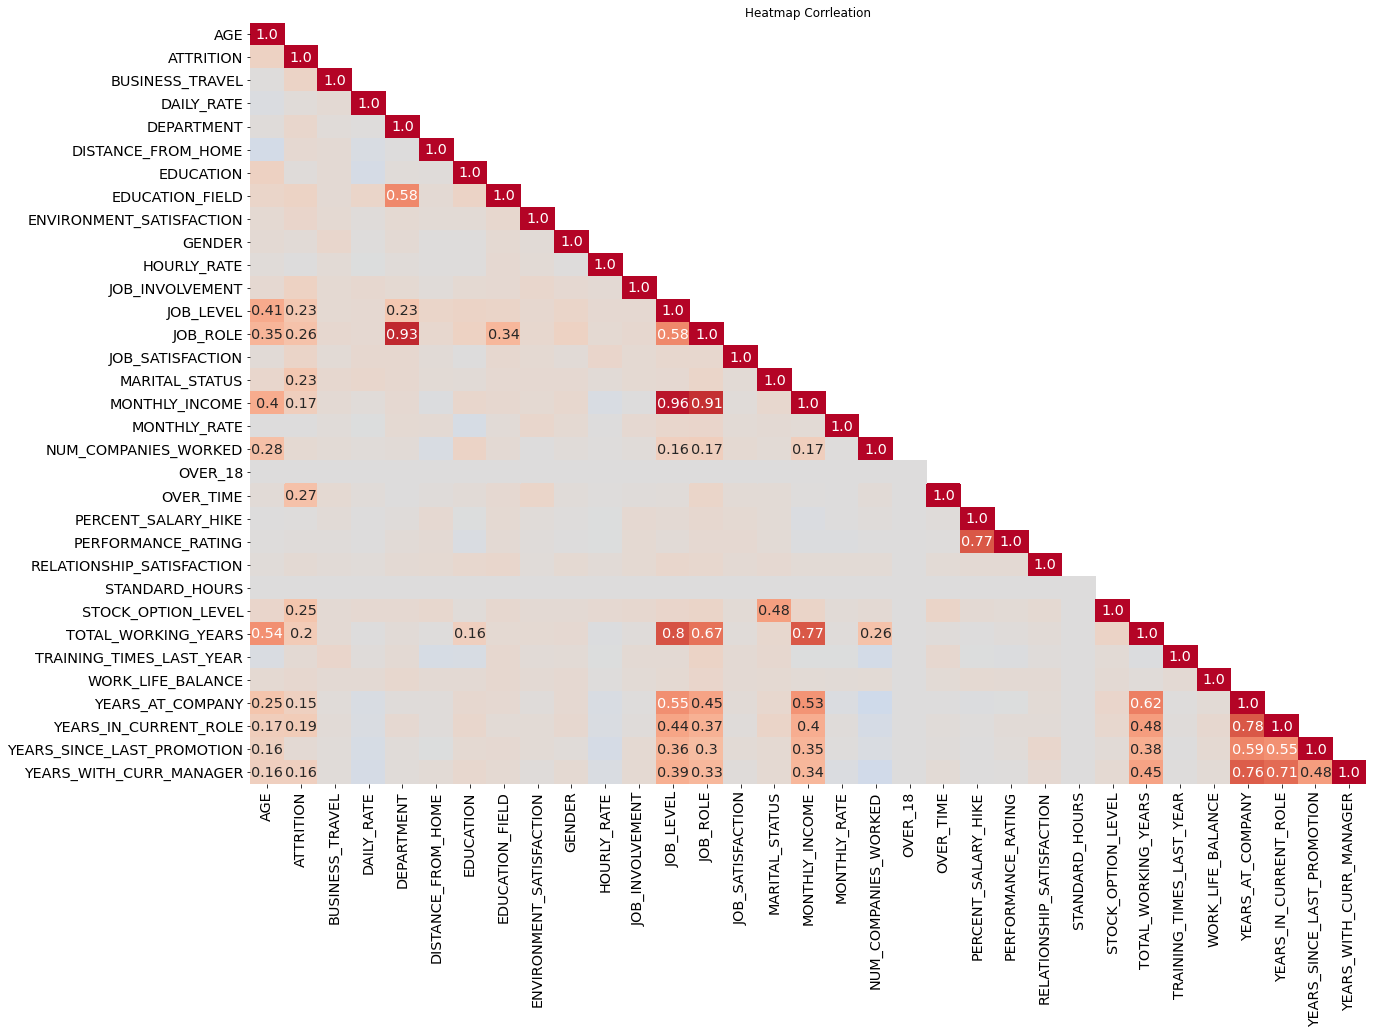

In [16]:
customized_heatmap(corr_df)


Lets see as expected job level has postive and higher correlation with other features like years expeirence, monthly income and the department people are working on. 

Looks like relationship with current manager gives a good boost on your chances for your current role and you continue on having your job. 

## Null Columns

## Dealing With Missing Values

In [17]:
missing_df = df.copy()

In [18]:
missing_df.loc[:,missing_df.isnull().sum()>0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 893 non-null    float64
 1   BUSINESS_TRAVEL     1024 non-null   object 
 2   DAILY_RATE          1002 non-null   float64
 3   DISTANCE_FROM_HOME  934 non-null    float64
 4   MARITAL_STATUS      1024 non-null   object 
dtypes: float64(3), object(2)
memory usage: 40.3+ KB


### Age 

Age has highest correlation with workingyears so, lets make 5 bins 0-9, 9-18.. so on and the average the age value by bins and fill the values.

In [19]:
bins = [i for i in range(0,49,9)]
labels =[str(val-9)+"-"+str(val) for val in bins[1:]]

working_years_bins = pd.cut(missing_df['TOTAL_WORKING_YEARS'], bins=bins, labels=labels, right=False)

In [20]:
missing_df['WORKING_YEARS_BINS'] = working_years_bins

In [21]:
grp_by_age_exp = missing_df[['WORKING_YEARS_BINS','JOB_ROLE','AGE']].groupby(['WORKING_YEARS_BINS']).mean().round()

In [22]:
print(grp_by_age_exp.index.values)
print("*"*20)
print(grp_by_age_exp.AGE.values)

['0-9', '9-18', '18-27', '27-36', '36-45']
Categories (5, object): ['0-9' < '9-18' < '18-27' < '27-36' < '36-45']
********************
[32. 38. 45. 52. 56.]


In [23]:
missing_df.WORKING_YEARS_BINS.unique().tolist()

['27-36', '0-9', '18-27', '9-18', '36-45']

In [24]:
import math

# 
def age_missing_values(cols):
    age = cols[0]
    years_experience= cols[1]
    if math.isnan(age): # if age is missing
        if years_experience == '1-9':
            return 32.0
        elif years_experience == '9-18':
            return 38.0
        elif years_experience == '18-27':
            return 45.0
        elif years_experience == '27-36':
            return 52.0
        else:
            return 56.0
    else:# if age is not missing
        
        return age
        
        
        

In [25]:
age =missing_df[['AGE','WORKING_YEARS_BINS']].apply(age_missing_values, axis=1)


In [26]:
missing_df['AGE']= age

## Distance From Home

In [27]:
missing_df.columns

Index(['AGE', 'ATTRITION', 'BUSINESS_TRAVEL', 'DAILY_RATE', 'DEPARTMENT',
       'DISTANCE_FROM_HOME', 'EDUCATION', 'EDUCATION_FIELD', 'EMPLOYEE_COUNT',
       'EMPLOYEE_NUMBER', 'ENVIRONMENT_SATISFACTION', 'GENDER', 'HOURLY_RATE',
       'JOB_INVOLVEMENT', 'JOB_LEVEL', 'JOB_ROLE', 'JOB_SATISFACTION',
       'MARITAL_STATUS', 'MONTHLY_INCOME', 'MONTHLY_RATE',
       'NUM_COMPANIES_WORKED', 'OVER_18', 'OVER_TIME', 'PERCENT_SALARY_HIKE',
       'PERFORMANCE_RATING', 'RELATIONSHIP_SATISFACTION', 'STANDARD_HOURS',
       'STOCK_OPTION_LEVEL', 'TOTAL_WORKING_YEARS', 'TRAINING_TIMES_LAST_YEAR',
       'WORK_LIFE_BALANCE', 'YEARS_AT_COMPANY', 'YEARS_IN_CURRENT_ROLE',
       'YEARS_SINCE_LAST_PROMOTION', 'YEARS_WITH_CURR_MANAGER',
       'WORKING_YEARS_BINS'],
      dtype='object')

In [28]:
# missing_df.distancefromhome.value_counts(dropna=False)

In [29]:
missing_df[['DISTANCE_FROM_HOME','STANDARD_HOURS','OVER_TIME','GENDER']].head()

,DISTANCE_FROM_HOME,STANDARD_HOURS,OVER_TIME,GENDER
0,1.0,80,No,Male
1,6.0,80,No,Male
2,7.0,80,No,Male
3,NaN,80,No,Male
4,7.0,80,No,Male


In [30]:
missing_df.STANDARD_HOURS.value_counts()

80    1029
Name: STANDARD_HOURS, dtype: int64

Standard hours seems to have only one values,it would not help us either in analysis or model prediction so lets drop it. 

In [31]:
missing_df.drop('STANDARD_HOURS', axis=1, inplace=True)

In [32]:
missing_df[['DISTANCE_FROM_HOME','OVER_TIME','GENDER']].groupby(['GENDER','OVER_TIME']).mean().round(2).unstack(0)

DISTANCE_FROM_HOME       
GENDER                Female   Male
OVER_TIME                          
No                     10.33   9.32
Yes                    10.10  10.82

I am using the logic that gender has a relation with distance from home, and also overtime is differnt genderwise.

In [33]:
def fill_distance_frm_home(cols):
    distance = cols[0]
    gender = cols[1]
    overtime=cols[2]
    
    if math.isnan(distance):
        if gender=="Male" and overtime=="Yes":
            return 10.82
        elif gender=="Male" and overtime=="No":
            return 9.32
        elif gender=="Female" and overtime=="No":
            return 10.33
        else:
            return 10.10
    else:
        return distance
    
    

In [34]:
distance_frm_home = missing_df[['DISTANCE_FROM_HOME','OVER_TIME','GENDER']].apply(fill_distance_frm_home,axis=1)

In [35]:
missing_df['DISTANCE_FROM_HOME'] = distance_frm_home

## Daily Rate

In [36]:
missing_df.loc[:,missing_df.columns.str.contains('MONTH')].columns

Index(['MONTHLY_INCOME', 'MONTHLY_RATE'], dtype='object')

In [37]:
missing_df.loc[:,missing_df.columns.str.contains('YEAR')].columns

Index(['TOTAL_WORKING_YEARS', 'TRAINING_TIMES_LAST_YEAR', 'YEARS_AT_COMPANY',
       'YEARS_IN_CURRENT_ROLE', 'YEARS_SINCE_LAST_PROMOTION',
       'YEARS_WITH_CURR_MANAGER', 'WORKING_YEARS_BINS'],
      dtype='object')

In [38]:
missing_df.loc[:,missing_df.columns.str.contains('RATE')].columns

Index(['DAILY_RATE', 'HOURLY_RATE', 'MONTHLY_RATE'], dtype='object')

In [39]:
missing_df.DAILY_RATE.describe()

count    1002.000000
mean      800.528942
std       408.109828
min       102.000000
25%       458.250000
50%       801.500000
75%      1162.000000
max      1496.000000
Name: DAILY_RATE, dtype: float64

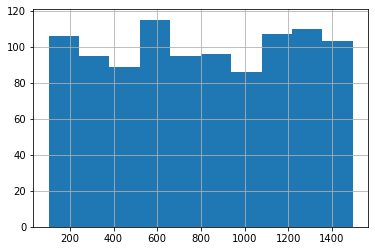

In [40]:
missing_df.DAILY_RATE.hist()

looks like distribution is kinda uniform. Theres no clarification what exactly is daily rate. Lets just fill the missing values with mean.

In [41]:
missing_df.DAILY_RATE.fillna(value=missing_df.DAILY_RATE.mean(), inplace=True)

## Business Travel

In [42]:
missing_df.loc[missing_df.BUSINESS_TRAVEL.isna()][['BUSINESS_TRAVEL','JOB_ROLE','DEPARTMENT' ]]

,BUSINESS_TRAVEL,JOB_ROLE,DEPARTMENT
171,NaN,Research Scientist,Research & Development
255,NaN,Manufacturing Director,Research & Development
260,NaN,Sales Executive,Sales
333,NaN,Sales Representative,Sales
339,NaN,Laboratory Technician,Research & Development


Lets fill the value with most popular travel stats from the same job role.

In [43]:
missing_df[(missing_df.JOB_ROLE=="Research Scientist")]['BUSINESS_TRAVEL'].value_counts()

Travel_Rarely        153
Travel_Frequently     45
Non-Travel            15
Name: BUSINESS_TRAVEL, dtype: int64

In [44]:
missing_df[(missing_df.JOB_ROLE=="Manufacturing Director")]['BUSINESS_TRAVEL'].value_counts()

Travel_Rarely        64
Travel_Frequently    22
Non-Travel            8
Name: BUSINESS_TRAVEL, dtype: int64

In [45]:
missing_df[(missing_df.JOB_ROLE=="Sales Executive")]['BUSINESS_TRAVEL'].value_counts()

Travel_Rarely        150
Travel_Frequently     39
Non-Travel            27
Name: BUSINESS_TRAVEL, dtype: int64

In [46]:
missing_df[(missing_df.JOB_ROLE=="Sales Representative")]['BUSINESS_TRAVEL'].value_counts()

Travel_Rarely        42
Travel_Frequently    19
Non-Travel            4
Name: BUSINESS_TRAVEL, dtype: int64

In [47]:
missing_df[(missing_df.JOB_ROLE=="Laboratory Technician")]['BUSINESS_TRAVEL'].value_counts()

Travel_Rarely        127
Travel_Frequently     32
Non-Travel            19
Name: BUSINESS_TRAVEL, dtype: int64

*Travel Rarely* is the popular option.

In [48]:
missing_df.BUSINESS_TRAVEL.fillna(value="Travel_Rarely", inplace=True)

## Marital Status

Lets check marital stats of same gender of same departments.

In [49]:
missing_df.MARITAL_STATUS.value_counts()

Married     474
Single      320
Divorced    230
Name: MARITAL_STATUS, dtype: int64

In [50]:
missing_df.loc[missing_df.MARITAL_STATUS.isna()][['GENDER','AGE','DEPARTMENT','JOB_ROLE' ]]

,GENDER,AGE,DEPARTMENT,JOB_ROLE
10,Male,40.0,Sales,Sales Executive
89,Female,43.0,Research & Development,Healthcare Representative
105,Female,29.0,Research & Development,Laboratory Technician
107,Female,41.0,Research & Development,Research Director
150,Male,57.0,Research & Development,Research Scientist


In [51]:
missing_df[(missing_df.GENDER=="Female") & (missing_df.DEPARTMENT=="Research & Development")]['MARITAL_STATUS'].value_counts()

Married     116
Single       86
Divorced     60
Name: MARITAL_STATUS, dtype: int64

In [52]:
missing_df[(missing_df.GENDER=="Male") & (missing_df.DEPARTMENT=="Research & Development")]['MARITAL_STATUS'].value_counts()

Married     186
Single      122
Divorced    102
Name: MARITAL_STATUS, dtype: int64

In [53]:
missing_df[(missing_df.GENDER=="Male") & (missing_df.DEPARTMENT=="Sales")]['MARITAL_STATUS'].value_counts()

Married     75
Single      61
Divorced    40
Name: MARITAL_STATUS, dtype: int64

We can fill married as the people of same gender in same department are mostly married. But this seems realy biased view. So, i'll just drop the missing values. Corrleation fig shows marital status has higher corelation with stock option level but it does not makes any sense to me. 

In [54]:
missing_df.dropna(inplace=True, axis=0)

In [55]:
missing_df.loc[:,missing_df.isna().sum()>0].columns

Index([], dtype='object')

Looks like we have filled missing data.

# EDA 

In [56]:
eda_df = missing_df.copy()

In [57]:
eda_df.drop('WORKING_YEARS_BINS',axis=1, inplace=True)

In [58]:
eda_df.head()

,AGE,ATTRITION,BUSINESS_TRAVEL,DAILY_RATE,DEPARTMENT,DISTANCE_FROM_HOME,EDUCATION,EDUCATION_FIELD,EMPLOYEE_COUNT,EMPLOYEE_NUMBER,...,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,TRAINING_TIMES_LAST_YEAR,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,10.1,3,Medical,1,644,...,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,3,4,0,18,4,3,8,6,4,0


## Distribution plot
Lets plot a dist plot to check if some properites are sure fire way to distinguish attrition, but lets first drop this employee count column it has only one value.

In [59]:
eda_df.drop('EMPLOYEE_COUNT', axis=1, inplace=True)

In [60]:
int_columns = eda_df.loc[:,eda_df.dtypes!='object'].columns



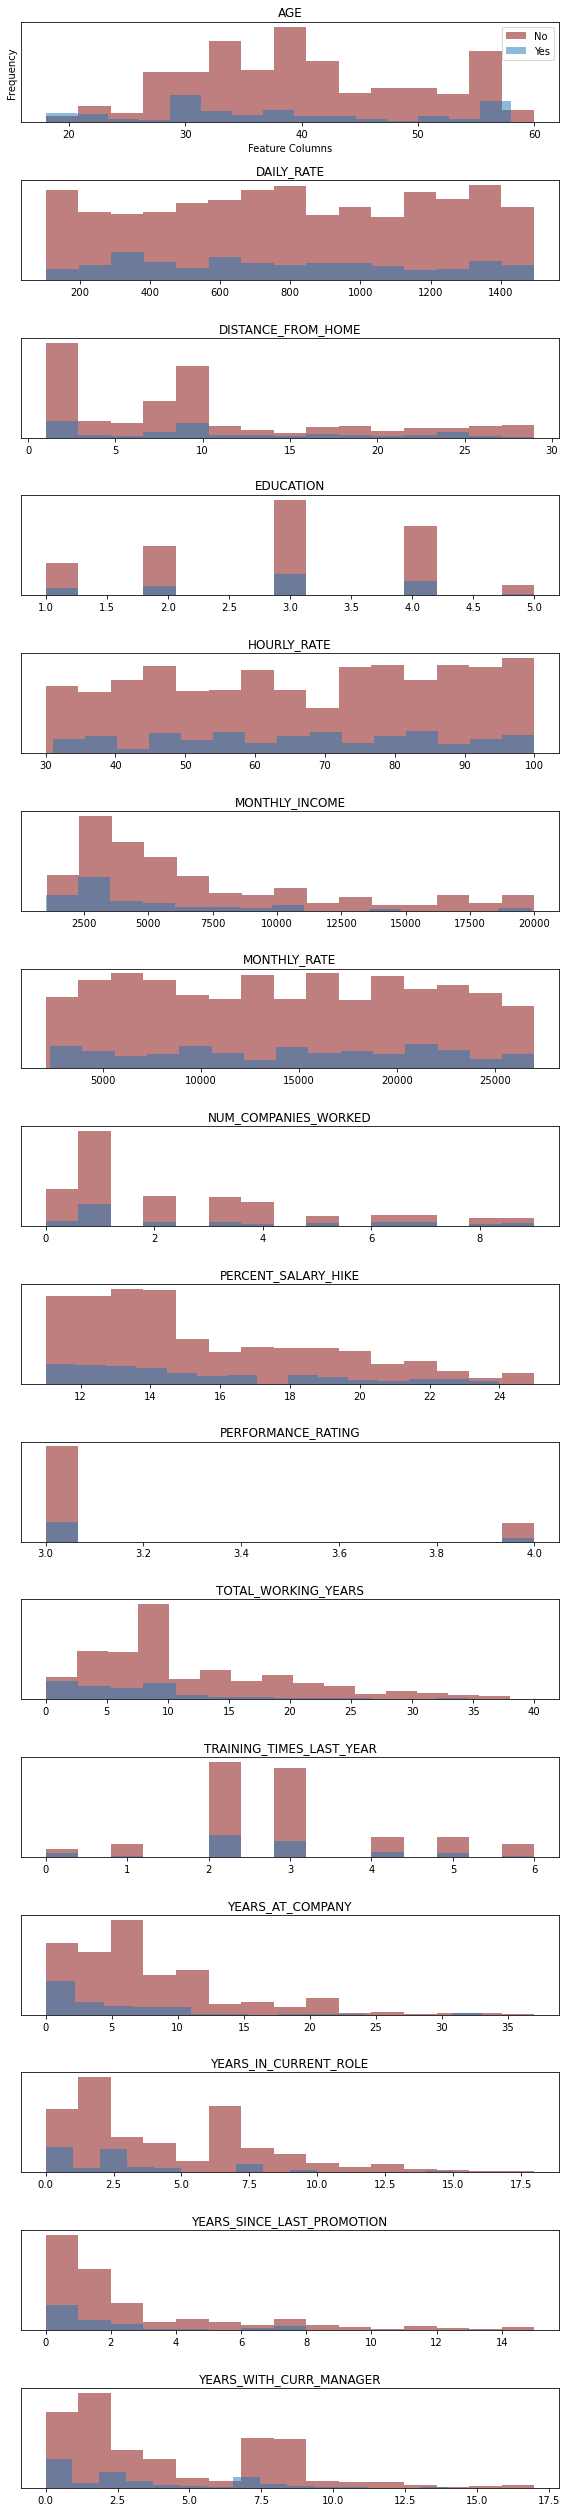

In [61]:
# sns.pairplot(eda_df[int_columns])

fig,axes = plt.subplots(len(int_columns), figsize=(8,35))
for i,col in enumerate(int_columns):
    axes[i].hist(eda_df[eda_df.ATTRITION == "No"][col].values, alpha=0.5, color="maroon", bins=15 )
    axes[i].hist(eda_df[eda_df.ATTRITION == "Yes"][col].values, alpha=0.5, bins=15)
    axes[i].set_title(col)
    axes[i].set_yticks(())#cause we are not actually looking for numbers
axes[0].set_xlabel("Feature Columns")
axes[0].set_ylabel("Frequency")
axes[0].legend(["No", "Yes"], loc="best")
fig.tight_layout()

Unfortunately, it seems the values are quite mixed to be sure. But if we look closely, attrition(value "Yes") are higher for employess with lesser monthly income, less total_working_years. And if we check age column either younger employees who are just starting thier career or older employees at retiring age are more likely to leave company than the middle aged ones. 

Interestingly if u check that num_of_companies worked, chances of leaving or staying are same as the number of companies increases.

In [62]:
 # lets drop employee_id

eda_df.drop('EMPLOYEE_NUMBER', inplace=True, axis=1)

In [63]:
print(eda_df.OVER_18.unique())


['Y']


In [64]:
#lets drop this column since it has only one values
eda_df.drop('OVER_18', inplace=True, axis=1)

In [65]:
str_columns = eda_df.loc[:,eda_df.dtypes=='object'].columns
eda_df[str_columns].head()


,ATTRITION,BUSINESS_TRAVEL,DEPARTMENT,EDUCATION_FIELD,ENVIRONMENT_SATISFACTION,GENDER,JOB_INVOLVEMENT,JOB_LEVEL,JOB_ROLE,JOB_SATISFACTION,MARITAL_STATUS,OVER_TIME,RELATIONSHIP_SATISFACTION,STOCK_OPTION_LEVEL,WORK_LIFE_BALANCE
0,No,Travel_Rarely,Research & Development,Medical,4,Male,3,4,Research Director,4,Divorced,No,3,1,2
1,No,Travel_Rarely,Research & Development,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,No,4,2,3
2,Yes,Travel_Rarely,Sales,Marketing,2,Male,3,1,Sales Representative,2,Single,No,2,0,3
3,No,Travel_Frequently,Human Resources,Medical,1,Male,3,5,Manager,2,Married,No,3,1,3
4,No,Travel_Rarely,Research & Development,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,No,4,0,3


## Field of Educations

Lets change values of education column to get clear meaning.

In [66]:
edu_levels= {    
    1: 'Highschool', 
    2 :'College  ' ,
    3: 'Bachelor', 
    4: 'Master' ,
    5 :'PHD'
}

In [67]:
eda_df.EDUCATION = eda_df.EDUCATION.replace(edu_levels)

In [68]:
labels = eda_df.EDUCATION.value_counts().index.values
values = eda_df.EDUCATION.value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Qualifications Of Employees", legend_title="Degrees", template="plotly_dark")

It appears most of the employess are undergraduates, while the ones with doctorates are the least.

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [70]:

employee_by_education_norm =eda_df[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME','EDUCATION']].copy()
employee_by_education_norm[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME']] = scaler.fit_transform(employee_by_education_norm[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME']])

In [71]:


employee_grp_by_education = eda_df[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME','EDUCATION']].groupby(['EDUCATION']).mean()
employee_grp_by_education_norm = employee_by_education_norm.groupby(['EDUCATION']).mean().sort_values('MONTHLY_INCOME',ascending=True)


In [72]:
x_value= employee_grp_by_education_norm.index.values

fig = go.Figure()
fig.add_trace(go.Bar(x=x_value, y = employee_grp_by_education_norm.AGE, name="Average Age", hovertext =employee_grp_by_education.AGE.values))
fig.add_trace(go.Bar(x=x_value, y = employee_grp_by_education_norm.TOTAL_WORKING_YEARS, name="Average Experience", hovertext =employee_grp_by_education.TOTAL_WORKING_YEARS.values))
fig.add_trace(go.Scatter(x=x_value,
                         y = employee_grp_by_education_norm.MONTHLY_INCOME,
                         mode="lines+markers", name="Monthly Income",
                         hovertext =employee_grp_by_education.MONTHLY_INCOME.values,
                         marker=dict(size =200*employee_grp_by_education_norm.MONTHLY_INCOME.values)))

fig.update_layout(title="Employees Education, Experience and Salary",
                  xaxis_title="Education Qualifications",
                  yaxis_title="Normalized Range",
                  template="plotly_white", 
                  xaxis_showgrid=False,
                  yaxis_showgrid=False)

Salary is increasing more with qualifications but difference is not that much. I am quite surprised by so less variation in salary. Lets check salary coluumn to check for outliers.

In [73]:
eda_df.MONTHLY_INCOME.describe()

count     1024.000000
mean      6434.383789
std       4782.322617
min       1009.000000
25%       2813.250000
50%       4726.000000
75%       8393.000000
max      19999.000000
Name: MONTHLY_INCOME, dtype: float64

As u can see the salary column is quite streteched, having 50% of values less than 5k and then max being 19k. 

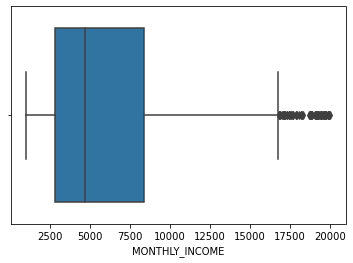

In [74]:
sns.boxplot(eda_df.MONTHLY_INCOME)

In [75]:
# Lets check for IQR 
# IQR  = third_quartile - first_quartile

iqr = eda_df.MONTHLY_INCOME.describe()[-2] - eda_df.MONTHLY_INCOME.describe()[4]


# Upper and Lower boundry of box plot 
upper_bound = 1.5*iqr + eda_df.MONTHLY_INCOME.describe()[-2]
lower_bound = eda_df.MONTHLY_INCOME.describe()[4] - 1.5*iqr 


print(iqr, upper_bound,lower_bound)

5579.75 16762.625 -5556.375


So, it seems any salary above 16.5k are outliers for this dataset. Lets only take the salary upto 17k and check the graph again.

In [76]:
employee_after_filtered_income_norm =eda_df[eda_df.MONTHLY_INCOME <=17000][['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME','EDUCATION']].copy()
employee_after_filtered_income_norm[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME']] = scaler.fit_transform(employee_after_filtered_income_norm[['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME']])

In [77]:
employee_filetered_income_grp_by_education = eda_df[eda_df.MONTHLY_INCOME <=17000][['AGE','TOTAL_WORKING_YEARS','MONTHLY_INCOME','EDUCATION']].groupby(['EDUCATION']).mean()
employee_filetered_income_grp_by_education_norm = employee_after_filtered_income_norm.groupby(['EDUCATION']).mean().sort_values('MONTHLY_INCOME',ascending=True)

In [78]:
x_value= employee_filetered_income_grp_by_education_norm.index.values

fig = go.Figure()
fig.add_trace(go.Bar(x=x_value,
                     y = employee_filetered_income_grp_by_education_norm.AGE,
                     name="Average Age", 
                     hovertext =employee_filetered_income_grp_by_education.AGE.values))
fig.add_trace(go.Bar(x=x_value,
                     y = employee_filetered_income_grp_by_education_norm.TOTAL_WORKING_YEARS, 
                     name="Average Experience", 
                     hovertext =employee_filetered_income_grp_by_education.TOTAL_WORKING_YEARS.values))
fig.add_trace(go.Scatter(x=x_value,
                         y = employee_filetered_income_grp_by_education_norm.MONTHLY_INCOME,
                         mode="lines+markers", 
                         name="Monthly Income",
                         hovertext =employee_filetered_income_grp_by_education.MONTHLY_INCOME.values,
                         marker=dict(size =200*employee_filetered_income_grp_by_education_norm.MONTHLY_INCOME.values)))

fig.update_layout(title="Employees Education, Experience and Salary",
                  xaxis_title="Qualifications",
                  yaxis_title="Normalized Range",
                  template="plotly_white", 
                  xaxis_showgrid=False,
                  yaxis_showgrid=False)

Salary does increase with qualifications. But college graduates seems to have more salary with less experience in comparision to those bachelor's degree. Though filtering outliers has not changed the order in terms of income. If you check previous graph, you'll notice the experience for each bar has decreased in some amount. 


In [79]:
eda_df[eda_df.EDUCATION =="Highschool"]['AGE'].describe()

count    133.000000
mean      35.285714
std       11.741258
min       18.000000
25%       27.000000
50%       32.000000
75%       42.000000
max       56.000000
Name: AGE, dtype: float64

In [80]:
highschool_education = eda_df[eda_df.EDUCATION=="Highschool"].sort_values('AGE', ascending=True).copy()
highschool_education_norm = highschool_education.copy()
highschool_education_norm.loc[:,highschool_education_norm.dtypes!= 'object'] = scaler.fit_transform(highschool_education_norm.loc[:,highschool_education_norm.dtypes!= 'object'])


In [81]:
# highschool_education.loc[:,highschool_education.dtypes!= 'object'].columns

In [82]:
highschool_grp_by_age = highschool_education.groupby(['AGE']).mean()
highschool_grp_by_age_norm = highschool_education_norm.groupby(['AGE']).mean()

In [83]:
x_value= highschool_grp_by_age.index.values

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_value, y = highschool_grp_by_age_norm.MONTHLY_INCOME,
                         name="Average Monthly Income",mode="lines+markers",
                         hovertext=highschool_grp_by_age.MONTHLY_INCOME.values ))

fig.add_trace(go.Bar(x=x_value, y = highschool_grp_by_age_norm.YEARS_AT_COMPANY, 
                     name="Average Years On Company ",
                     hovertext= highschool_grp_by_age.YEARS_AT_COMPANY.values))
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")



## Research Paper on Employee Attrition

Up unitl now I was just analyzing based on my intuitions. But i recently went through an research paper on [employee attrition](http://kth.diva-portal.org/smash/get/diva2:1461317/FULLTEXT01.pdf). Here are few highlights I could capture.

### Few keypoints

- **Employee satisfaction is inversely related to Attrition.**


- **Effect of Attrition on a company.**
    - Negative effect on producticity.
    - Knowledge loss, gone with the employee.
    - Increase in workload for remaining employees.
    - Negative impact on companies morale.
    - More expense on process for hiring and training new employess.
    

- **Why employess leave job(internal reasons)?**
    - Disatisfaction
    - No-commitment to the company


- **Factors affecting satisfaction(internal).**
    - Connectedness to others 
    - Feeling of belonging somewhere.
    - Feeling of support from organization.
    - Resonable workload.
    
    
- **Using ML in HRM (Human Resource Management).**
    - Small data, and sometimes not even recorded.
    - Decision made by HR have heavy consequences.
    - Measuring performace is hard, depends on teamwork. And individual performance is difficult to extract from teams performance.
    - Hiring/Firing is not only based on tangible reasons but also on psychological relations between employees.
    - ML algorithms can be biased and can not take into account of everything about future employees for instance race can cause bias. *Author also gives example of Amazon removing gender column to remove biases.*
        

**ML Model Interpreteability**

Local: Relation between prediction and small subsets of data.

Global: Relation between prediction and large segment of data. 

Global helps to understand how the model works as a whole. Local can be more descriptive of how model is performing.

As far as the ML alorigthms, author has used SVM, Logistic Regression and Random forest and did comparision between them. 

(*Again these all info's are something I took as a note from the research paper I mentioned above and not my work.*)
   

Based on above notes lets extract some relevant columns from our data to explore. 

In [84]:
eda_df.ENVIRONMENT_SATISFACTION.value_counts()

3    308
4    300
2    209
1    207
Name: ENVIRONMENT_SATISFACTION, dtype: int64

Most of the employees have higher satisfaction meaning most of them have good relation with other co-workers.

## Dis-satisfaction

Lets make some groups by Attrition and level of satisfaction.

In [85]:
# eda_df[(eda_df.ATTRITION=="Yes") & (eda_df.JOB_SATISFACTION=="1")]


In [86]:
# Attrition And Environment Satisfaction 
attrition_n_env_satisfaction = eda_df[['ATTRITION','ENVIRONMENT_SATISFACTION','JOB_SATISFACTION']].groupby(['ATTRITION','ENVIRONMENT_SATISFACTION']).count().unstack(0)
attrition_n_env_satisfaction.columns= ['Attrition_No', "Attrition_Yes"]
attrition_n_env_satisfaction.index= ['level_1','level_2','level_3','level_4']


# Attrition And  JOB_INVOLVEMENT
attrition_n_job_involvement = eda_df[['ATTRITION','JOB_INVOLVEMENT','JOB_SATISFACTION']].groupby(['ATTRITION','JOB_INVOLVEMENT']).count().unstack(0)
attrition_n_job_involvement.columns= ['Attrition_No', "Attrition_Yes"]
attrition_n_job_involvement.index= ['level_1','level_2','level_3','level_4']


# Attrition And  JOB_SATISFACTION
attrition_n_job_satisfaction = eda_df[['ATTRITION','JOB_INVOLVEMENT','JOB_SATISFACTION']].groupby(['ATTRITION','JOB_SATISFACTION']).count().unstack(0)
attrition_n_job_satisfaction.columns= ['Attrition_No', "Attrition_Yes"]
attrition_n_job_satisfaction.index= ['level_1','level_2','level_3','level_4']


# Attrition And  RELATIONSHIP_SATISFACTION
attrition_n_rel_satisfaction = eda_df[['ATTRITION','JOB_INVOLVEMENT','RELATIONSHIP_SATISFACTION']].groupby(['ATTRITION','RELATIONSHIP_SATISFACTION']).count().unstack(0)
attrition_n_rel_satisfaction.columns= ['Attrition_No', "Attrition_Yes"]
attrition_n_rel_satisfaction.index= ['level_1','level_2','level_3','level_4']


# Attrition And  WORK_LIFE_BALANCE
attrition_n_work_life_bal = eda_df[['ATTRITION','JOB_INVOLVEMENT','WORK_LIFE_BALANCE']].groupby(['ATTRITION','WORK_LIFE_BALANCE']).count().unstack(0)
attrition_n_work_life_bal.columns= ['Attrition_No', "Attrition_Yes"]
attrition_n_work_life_bal.index= ['level_1','level_2','level_3','level_4']



In [87]:
# #Now Lets plot them by satisfaction level and attrition No

# fig = go.Figure()

# fig.add_trace(go.Scatter(x= attrition_n_work_life_bal.index.values, y= attrition_n_work_life_bal.Attrition_Yes, name="Work Life Balance"))


# fig.add_trace(go.Scatter(x= attrition_n_rel_satisfaction.index.values, y= attrition_n_rel_satisfaction.Attrition_Yes, name="Relatoinship Satisfaction"))
# fig.add_trace(go.Scatter(x= attrition_n_env_satisfaction.index.values, y= attrition_n_env_satisfaction.Attrition_Yes, name="Environment Satisfaction"))
# fig.add_trace(go.Scatter(x= attrition_n_job_involvement.index.values, y= attrition_n_job_involvement.Attrition_Yes, name="Job Involivement "))
# fig.add_trace(go.Scatter(x= attrition_n_job_satisfaction.index.values, y= attrition_n_job_satisfaction.Attrition_Yes, name="Job Satisfaction"))

# fig.update_layout(title="Satisfaction Lvl Vs Attrition = 'Yes'", 
#                  xaxis_title="Satisfaction Level, more the better",
#                 yaxis_title="Frequency",
#                   template="plotly_white", 
#                   xaxis_showgrid=False,
#                   yaxis_showgrid=False,
#                   legend_title="Features")

In [88]:
#Now Lets plot them by satisfaction level and attrition No

fig = go.Figure()

fig.add_trace(go.Bar(x= attrition_n_work_life_bal.index.values, y= attrition_n_work_life_bal.Attrition_Yes, name="Work Life Balance"))


fig.add_trace(go.Bar(x= attrition_n_rel_satisfaction.index.values, y= attrition_n_rel_satisfaction.Attrition_Yes, name="Relatoinship Satisfaction"))
fig.add_trace(go.Bar(x= attrition_n_env_satisfaction.index.values, y= attrition_n_env_satisfaction.Attrition_Yes, name="Environment Satisfaction"))
fig.add_trace(go.Bar(x= attrition_n_job_involvement.index.values, y= attrition_n_job_involvement.Attrition_Yes, name="Job Involivement "))
fig.add_trace(go.Bar(x= attrition_n_job_satisfaction.index.values, y= attrition_n_job_satisfaction.Attrition_Yes, name="Job Satisfaction"))

fig.update_layout(title="Satisfaction Lvl Vs Attrition = 'Yes'", 
                 xaxis_title="Satisfaction Level, more the better",
                yaxis_title="Frequency",
                  template="plotly_white", 
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  legend_title="Features")

In [89]:
#Now Lets plot them by satisfaction level and attrition No

fig = go.Figure()

fig.add_trace(go.Bar(x= attrition_n_work_life_bal.index.values, y= attrition_n_work_life_bal.Attrition_No, name="Work Life Balance"))


fig.add_trace(go.Bar(x= attrition_n_rel_satisfaction.index.values, y= attrition_n_rel_satisfaction.Attrition_No, name="Relatoinship Satisfaction"))
fig.add_trace(go.Bar(x= attrition_n_env_satisfaction.index.values, y= attrition_n_env_satisfaction.Attrition_No, name="Environment Satisfaction"))
fig.add_trace(go.Bar(x= attrition_n_job_involvement.index.values, y= attrition_n_job_involvement.Attrition_No, name="Job Involivement "))
fig.add_trace(go.Bar(x= attrition_n_job_satisfaction.index.values, y= attrition_n_job_satisfaction.Attrition_No, name="Job Satisfaction"))

fig.update_layout(title="Satisfaction Lvl Vs Attrition = 'No'", 
                 xaxis_title="Satisfaction Level, more the better",
                yaxis_title="Frequency",
                  template="plotly_white", 
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  legend_title="Features")

If you check the graph, work life balance and involvement of employee's involvement needs to be at most satisfying level incomparision to other factors. 



In [90]:
# eda_df[['ENVIRONMENT_SATISFACTION','ATTRITION', 'DEPARTMENT', 'GENDER','JOB_INVOLVEMENT','JOB_LEVEL','JOB_SATISFACTION','MARITAL_STATUS',
#        'OVER_TIME','PERFORMANCE_RATING','RELATIONSHIP_SATISFACTION', 'WORK_LIFE_BALANCE','YEARS_SINCE_LAST_PROMOTION']]

# Feature Selection Using PCA

lets drop the gender column before we approach pca.

In [91]:
feature_df = eda_df.copy()

In [92]:
feature_df.drop('GENDER', inplace=True, axis=1)

In [93]:
int_columns = feature_df.loc[:,feature_df.dtypes=="int"].columns
obj_columns = feature_df.loc[:,feature_df.dtypes!="int"].columns

## Dummify 

In [94]:
dummified_feature_df = pd.get_dummies(feature_df.loc[:,feature_df.columns != "ATTRITION"],drop_first=True)


In [95]:
target =feature_df['ATTRITION']

## Normalize

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
dummified_feature_df[int_columns] = scaler.fit_transform(dummified_feature_df[int_columns])

# Model Selection

In [99]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(dummified_feature_df, target, test_size=0.3, random_state=101)

In [101]:
X_hold, X_test_final, y_hold, y_test_final = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [103]:
num_folds = 10
scoring = "accuracy"
models=[]
rand_seed= 101

models.append(("Knn",KNeighborsClassifier(n_neighbors=5,p=2,leaf_size=10,) ))
models.append(("Svm",SVC(random_state=rand_seed )))
models.append(("Rf", RandomForestClassifier(n_estimators=50,max_depth=5,random_state=rand_seed )))



results=[]
names=[]
metrics=[]

In [104]:
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=rand_seed, shuffle=True)
    cv_score = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
    
    names.append(name)
    results.append(cv_score)
    metrics.append(cv_score.mean())
    
    print("{name}: {score}".format(name=name,score= cv_score.mean()))

Knn: 0.8281494522691706
Svm: 0.8295970266040689
Rf: 0.8352112676056338


In [105]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

These following codes are commented to save version faster.

In [106]:
# # Number of trees in random forest
# n_estimators = [i for i in range(200,2001, 200)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [i for i in range(10, 111,10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [107]:
# COmmented to save version faster


# rf = RandomForestClassifier()


# # Random search of parameters, using 3 fold cross validation, 
# # search across 80 different combinations, and use all available cores
# rf_random_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 80, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random_cv.fit(X_train,y_train)



In [108]:
print(rf_random_cv.best_params_)

NameError: name 'rf_random_cv' is not defined

Results from best parmas of randmonized RF :

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}







In [109]:
param_grid_rf = {
    'bootstrap':[False],
    'max_depth': [10,20,30,20,50],
    'max_features': ['auto'],
    'min_samples_leaf': [ 1,3,4, 8],
    'min_samples_split': [2,4,6,8],
    'n_estimators': [200,400,600,1200,1000]
}

In [110]:
# # Instantiate the grid search model
# grid_search_cv_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, 
#                           cv = 10, n_jobs = -1, verbose = 0)

# grid_search_cv_rf.fit(X_train, y_train)


#Commented to run version 

In [111]:
# print(grid_search_cv_rf.best_params_)

In [112]:
final_rf= RandomForestClassifier(bootstrap=False,                                
                                   max_depth=50,
                                   min_samples_leaf=8,
                                   min_samples_split=8,
                                   n_estimators=200)

In [113]:
import time

In [114]:
rf_start = time.time()

final_rf.fit(X_train,y_train)
rf_end = time.time()
eval_time_rf = rf_end -rf_start



In [115]:
# print("Accuracy For Random Forest on Test Set: {}.".format(pipe.score(X_test_final,y_test_final)*100) )
print("Accuracy For Random Forest on Hold out Set: {}.".format(final_rf.score(X_hold,y_hold)*100) )
print("Total time taken by RF to fit the model: {:.2f} sec".format(eval_time_rf))


Accuracy For Random Forest on Hold out Set: 86.04651162790698.
Total time taken by RF to fit the model: 0.46 sec


# Feature Selection with PCA

In [116]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(2)

In [118]:
pca_transformed= pca.fit_transform(dummified_feature_df)

In [119]:
pca_transformed_df = pd.DataFrame(pca.components_, columns=dummified_feature_df.columns)

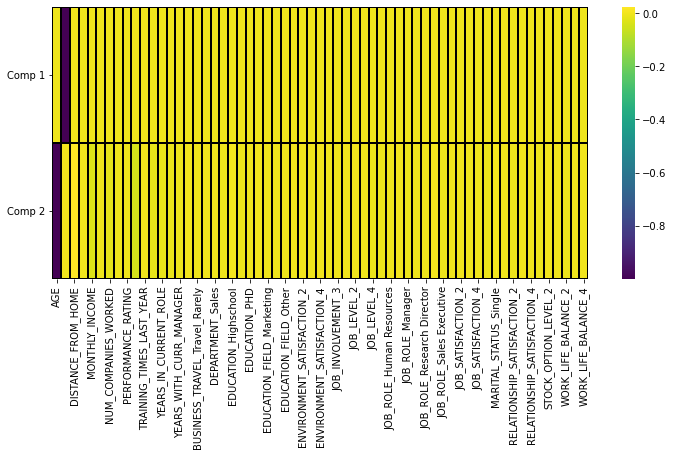

In [120]:
plt.figure(figsize=(12,5))
sns.heatmap(pca_transformed_df,cmap="viridis", yticklabels=["Comp 1", "Comp 2"] ,lw=1,linecolor="black" );
plt.yticks(rotation=360);


In [121]:
np.abs(pca_transformed_df.iloc[0,:]).sort_values().iplot(kind="bar")

In [122]:
np.abs(pca_transformed_df.iloc[1,:]).sort_values().iplot(kind="bar")

In [123]:
np.abs(pca_transformed_df.iloc[0,:])

AGE                     0.000650
DAILY_RATE              1.000000
DISTANCE_FROM_HOME      0.000381
HOURLY_RATE             0.000073
MONTHLY_INCOME          0.000066
                          ...   
STOCK_OPTION_LEVEL_2    0.000012
STOCK_OPTION_LEVEL_3    0.000032
WORK_LIFE_BALANCE_2     0.000024
WORK_LIFE_BALANCE_3     0.000002
WORK_LIFE_BALANCE_4     0.000037
Name: 0, Length: 61, dtype: float64